In [ ]:
import torch
import numpy as np
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import Normalize
from validation import power
from matplotlib import gridspec

In [ ]:
# load test data
mass_mstar = np.load(
                '/n/holystore01/LABS/itc_lab/Lab/Camels/2D_maps/Maps_Mstar_IllustrisTNG_1P_z=0.00.npy'
            )
mass_cdm = np.load(
                '/n/holystore01/LABS/itc_lab/Lab/Camels/2D_maps/Maps_Mcdm_IllustrisTNG_1P_z=0.00.npy'
            )
mass_mstar = np.log10(mass_mstar+1)
mass_cdm = np.log10(mass_cdm)
mass_mstar = (mass_mstar - mass_mstar.mean()) / mass_mstar.std()
mass_cdm = (mass_cdm - mass_cdm.mean()) / mass_cdm.std()
mass_mstar = torch.Tensor(mass_mstar).unsqueeze(1)
mass_cdm = torch.Tensor(mass_cdm).unsqueeze(1)

In [14]:
from torch.utils.data import DataLoader, TensorDataset
data = TensorDataset(mass_mstar, mass_cdm)
dataloader = DataLoader(data, batch_size=1)

In [35]:
powers_pred = []
powers_true = []

for i in range(0, 990, 15):
    powers_true.append(torch.load(f'debiasing/powers/dm/true_256_single_batch_{i}.pt'))
    powers_pred.append(torch.load(f'debiasing/powers/dm/pred_256_single_batch_{i}.pt'))

In [ ]:
params = pandas.read_csv('/n/holystore01/LABS/itc_lab/Lab/Camels/2D_maps/params_1P_IllustrisTNG.txt', sep=' ', header=None)

In [ ]:
labels = [r'$\Omega_m$', r'$\sigma_8$', r'$A_{SN1}$', r'$A_{AGN1}$', r'$A_{SN2}$', r'$A_{AGN2}$']

In [ ]:
k_64 = torch.load('debiasing/powers/dm/k_64.pt')
k_128 = torch.load('debiasing/powers/dm/k.pt')

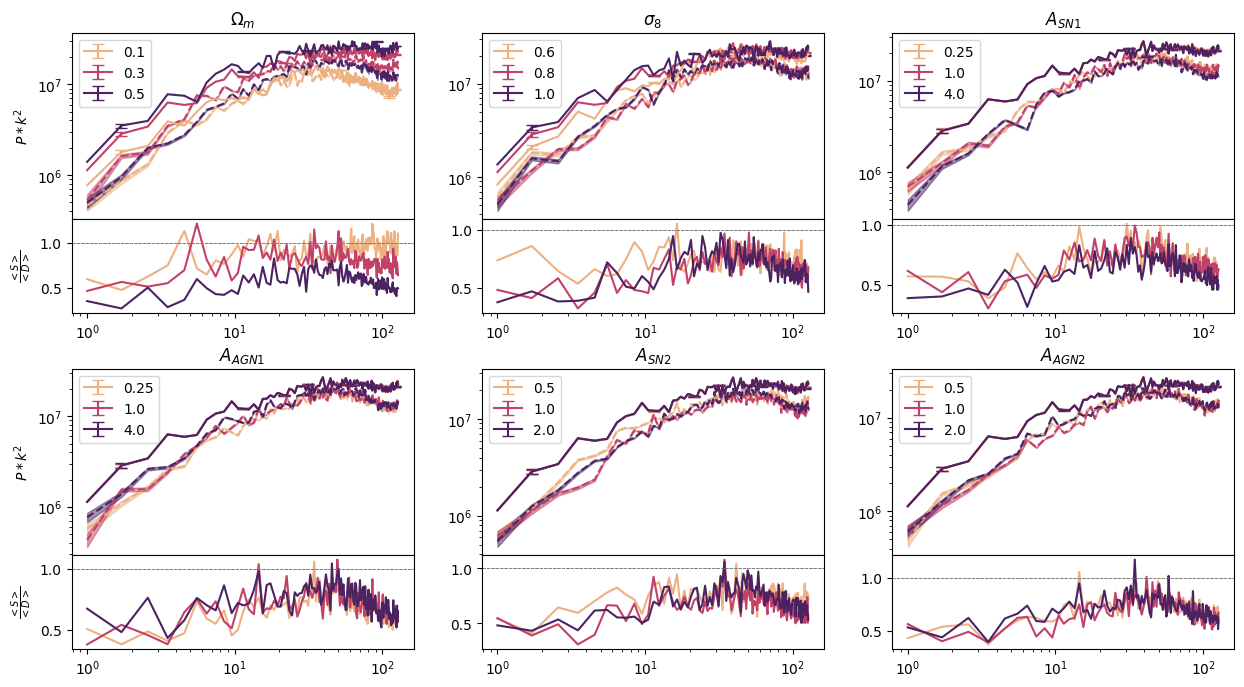

In [36]:
fig = plt.figure('constrained', figsize=(15, 8))
gs0 = gridspec.GridSpec(2, 3, figure=fig)
colormap = sns.color_palette("flare", as_cmap=True)
norm = Normalize(vmin=0, vmax=2)

selected = [[0, 5, 10], [11, 16, 21], [22, 27, 32], [33, 38, 43], [44, 49, 54], [55, 60, 65]]

# index for outer loop
i = 0

for row in range(2):
    for col in range(3):
        gs = gs0[row, col].subgridspec(2, 1, height_ratios=[2, 1], hspace=0)
        ax1 = fig.add_subplot(gs[0,0])
        ax1.tick_params(labelbottom=False)
        ax2 = fig.add_subplot(gs[1,0])
        # ax2.set_ylim(-0.65, -0.15)
        if col==0:
            ax1.set_ylabel(r'$P*k^2$')
            ax2.set_ylabel(r'$\frac{<S>}{<D>}$')
            
        # color = colormap(norm(i))
        # ax1.loglog(k_128.cpu(), powers_pred[j].cpu()*(k_128.cpu()**2), color=color, linestyle='dashed')
        # std_pred = torch.sqrt(torch.var(powers_pred[j]))
        # std_true = torch.sqrt(torch.var(powers_true[j]))
        # ax1.errorbar(k_128.cpu(), powers_true[j].cpu()*(k_128.cpu()**2), yerr=std_true.cpu(), capsize=4, errorevery=(1, 10), color=color)
        # ax1.fill_between(k_128.cpu(), powers_pred[j].cpu()*(k_128.cpu()**2) - std_pred.cpu(), powers_pred[j].cpu()*(k_128.cpu()**2) + std_pred.cpu(), alpha=0.5, color=color)
        # ratio = (powers_pred[j] - powers_true[j]) / powers_true[j]
        # residual = (powers_pred[j] - powers_true[j]) / std_true
        # ax2.plot(k_128.cpu(), ratio.cpu(), color=color)
        # ax2.axhline(y=1, color='grey', lw=0.6, ls='dashed')
        # j += 11

        k = 0
        for j in selected[i]:
            color = colormap(norm(k))
            ax1.loglog(k_128.cpu(), powers_pred[j].cpu()*(k_128.cpu()**2), color=color, linestyle='dashed')
            std_pred = torch.sqrt(torch.var(powers_pred[j]))
            std_true = torch.sqrt(torch.var(powers_true[j]))
            ax1.errorbar(k_128.cpu(), powers_true[j].cpu()*(k_128.cpu()**2), yerr=std_true.cpu(), capsize=4, errorevery=(1, 10), color=color, label=params.iloc[j][i])
            ax1.fill_between(k_128.cpu(), powers_pred[j].cpu()*(k_128.cpu()**2) - std_pred.cpu(), powers_pred[j].cpu()*(k_128.cpu()**2) + std_pred.cpu(), alpha=0.5, color=color)
            ax1.legend(loc='upper left')
            ratio = powers_pred[j] / powers_true[j]
            mean_ratio = (powers_pred[j] - powers_true[j]) / powers_true[j]
            residual = (powers_pred[j] - powers_true[j]) / std_true
            ax2.plot(k_128.cpu(), ratio.cpu(), color=color)
            ax2.axhline(y=1, color='grey', lw=0.6, ls='dashed')
            k += 1
        
        ax1.set_title(labels[i])
        ax2.set_xscale('log')
        
        i = i + 1
    
plt.show()

In [37]:
fig.savefig('images/power/power_256_auto_corr_3_single.png', dpi=250)

In [5]:
powers_pred_128 = []
powers_true_128 = []

for i in range(990):
    powers_true_128.append(torch.load(f'debiasing/powers/dm/true_128_single_batch_{i}.pt'))
    powers_pred_128.append(torch.load(f'debiasing/powers/dm/pred_128_single_batch_{i}.pt'))

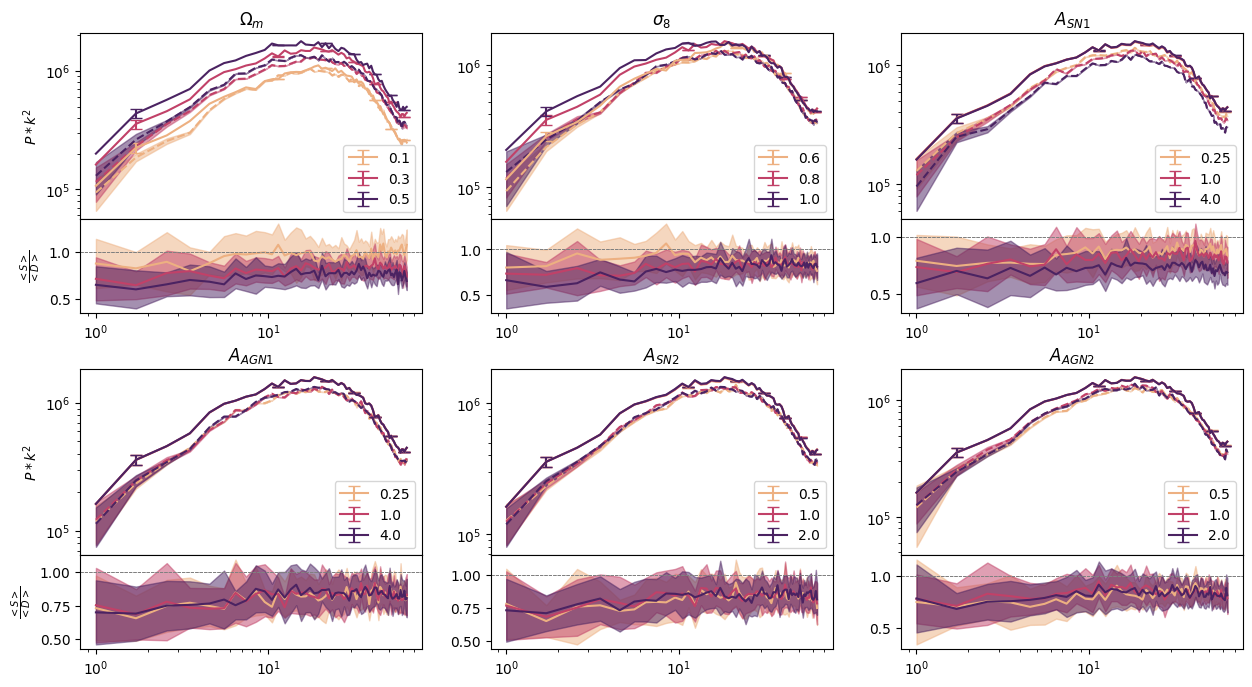

In [44]:
fig = plt.figure('constrained', figsize=(15, 8))
gs0 = gridspec.GridSpec(2, 3, figure=fig)

selected = [[0, 5, 10], [11, 16, 21], [22, 27, 32], [33, 38, 43], [44, 49, 54], [55, 60, 65]]
colormap = sns.color_palette("flare", as_cmap=True)
norm = Normalize(vmin=0, vmax=len(selected[0])-1)

# index for outer loop
i = 0

for row in range(2):
    for col in range(3):
        gs = gs0[row, col].subgridspec(2, 1, height_ratios=[2, 1], hspace=0)
        ax1 = fig.add_subplot(gs[0,0])
        ax1.tick_params(labelbottom=False)
        ax2 = fig.add_subplot(gs[1,0])
        if col==0:
            ax1.set_ylabel(r'$P*k^2$')
            ax2.set_ylabel(r'$\frac{<S>}{<D>}$')
        
        k = 0
        for j in selected[i]:
            avg_pred = torch.mean(torch.stack(powers_pred_128[j*15:j*15+15]), axis=0)
            std_pred = torch.sqrt(torch.var(torch.stack(powers_pred_128[j*15:j*15+15]), axis=0))
            avg_true = torch.mean(torch.stack(powers_true_128[j*15:j*15+15]), axis=0)
            std_true = torch.sqrt(torch.var(torch.stack(powers_true_128[j*15:j*15+15]), axis=0))
            ratio = avg_pred / avg_true
            lower_bound = (avg_pred-std_pred) / avg_true
            upper_bound = (avg_pred+std_pred) / avg_true
            
            color = colormap(norm(k))
            ax1.loglog(k_64.cpu(), avg_pred.cpu()*(k_64.cpu()**2), color=color, linestyle='dashed')
            # std_pred = torch.sqrt(torch.var(powers_pred_128[j]))
            # std_true = torch.sqrt(torch.var(powers_true_128[j]))
            ax1.errorbar(k_64.cpu(), avg_true.cpu()*(k_64.cpu()**2), yerr=std_true.cpu(), capsize=4, errorevery=(1, 10), color=color, label=params.iloc[j][i])
            ax1.fill_between(k_64.cpu(), avg_pred.cpu()*(k_64.cpu()**2) - std_pred.cpu(), avg_pred.cpu()*(k_64.cpu()**2) + std_pred.cpu(), alpha=0.5, color=color)
            ax1.legend(loc='lower right')
            # ratio = powers_pred_128[j] / powers_true_128[j]
            # mean_ratio = (powers_pred_128[j] - powers_true_128[j]) / powers_true_128[j]
            # residual = (powers_pred_128[j] - powers_true_128[j]) / std_true
            ax2.axhline(y=1, color='grey', lw=0.6, ls='dashed')
            ax2.plot(k_64.cpu(), ratio.cpu(), color=color)
            ax2.fill_between(k_64.cpu(), lower_bound.cpu(), upper_bound.cpu(), alpha=0.5, color=color)
            k += 1
        
        ax1.set_title(labels[i])
        # ax1.set_ylim(0.7e5, 0.3e8)
        ax2.set_xscale('log')
        
        i = i + 1
        
# j = 0.9

# ax = fig.add_subplot(gs0[1, 3])
# ax.set_axis_off()

# for j in range(6):
#     optional_params = dict(xy=(0.2, 0.9-0.1*j), 
#                        xycoords='axes fraction',
#                        ha='right')
#     ax.annotate(f'{labels[j]}: {params.iloc[0][j]}', **optional_params)
    
plt.show()

In [45]:
fig.savefig('images/power/power_128_auto_corr_3_single_averaged.png', dpi=250)